Author: Hsuan-lin Her
Created: 12-06-2018
Last Modified: 12-06-2018

Purpose: To calculate 
- Sequence identity within clusters in network
- Domain identity (pfam) within clusters
- nr annotation consistency
- CARD consistency
- COG consistency

Input: networks (LLS > threshold) file at ~/data0118/network1122

Annotations:
- pfam: ~/data0118/cdhit/pfam/df/Escherichia0.70
- nr: ~/data0118/network1122/ecoli70_simple.xlsx

In [2]:
# identify clusters
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [3]:
# load from edge list
path = '/home/hermuba/data0118/network1122/'
def edge_list(fname):
    
    file = path + fname
    edge = pd.read_csv(file, names = ['gene_one', 'gene_two','mutual_info', 'nrm_mutual'])
    edge[['gene_one', 'gene_two']].to_csv(path + fname + '_edgelist', index = False, header = False, na_rep = 'nan')
def to_net(fname):
    # generate edge_list
    edge_list(fname)
    
    net = nx.read_edgelist(path + fname + '_edgelist', delimiter = ',', nodetype = str,)
    return(net)


In [4]:
file_e = 'refseq_ordinary_40'
net = to_net(file_e)

In [5]:
# playing with the net
net.number_of_nodes()

17097

In [6]:
net.number_of_edges()

478627

In [7]:
nx.algorithms.components.number_connected_components(net)

2819

# Degree distribution

In [8]:
# degree distribution
degree_sequence = [d for n, d in net.degree()]

import numpy as np
degree_sequence = np.asarray(degree_sequence)

hist, bins = np.histogram(degree_sequence, bins = 50)

In [9]:
np.max(degree_sequence)

1209

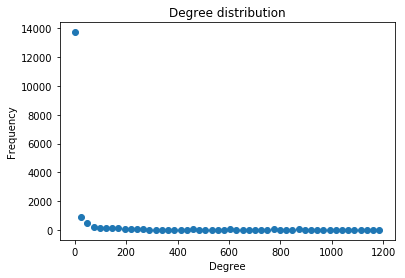

In [10]:
import matplotlib.pyplot as plt
plt.title('Degree distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.scatter(bins[:-1], hist)

Text(3, 3, 'r=-0.9766721279364478')

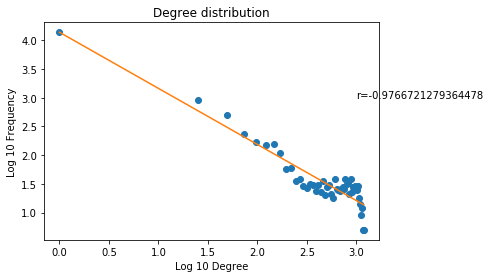

In [11]:
from scipy import stats
logx = np.log10(bins[:-1])
logy = np.log10(hist)

slope, intercept, r_value, p_value, std_err = stats.linregress(logx, logy)
line = slope*logx+ intercept


plt.title('Degree distribution')
plt.xlabel('Log 10 Degree')
plt.ylabel('Log 10 Frequency')
plt.plot(logx, logy, 'o',logx, line)
plt.text(3,3,'r='+str(slope))

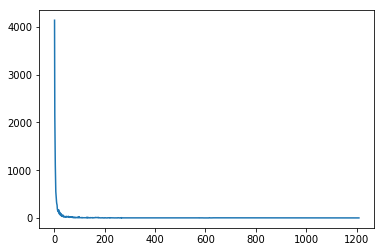

In [12]:
from collections import Counter
c = Counter(degree_sequence)
sorted(c.items())
plt.plot(*zip(*sorted(c.items())))